# Exercises - GEO4902-01 - General modeling concepts

Kjersti Stangeland, Fall 2024

# Exercise 01B - Access and plot AROME MetCoOp and ECMWF IFS forecasts

## Example for an extreme precipitation event in October 2014 in West Norway

In [2]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import cartopy as cy
from cmcrameri import cm
import cmocean.cm as cmo
import metpy
import windrose
from metpy.calc import wind_speed, wind_direction

__Task 1:__

This script plots the precipitation forecast of the regional model (AROME MetCoOp) and global model ECMWF, for the extreme precipitation event which occurred in 2014. More information on this event can be found here: https://www.nrk.no/emne/oktoberflaumen-2014-1.12012052 Lenker til en ekstern side.

Explore the convective and large-scale precipitation in the ECMWF model system.
* Zoom into the West Coast system. 
* Plot as maps and point forecasts (e.g. for Flåm) 

##### Specifiy input fields: AROME MetCoOp and ECMWF IFS forecasts

In [3]:
day='26'; month='10'; year='2014'; HH='12'

url='https://thredds.met.no/thredds/dodsC/aromemetcoopstarc/'+str(year)+'/'+str(month)+'/'+str(day)+'/AROME_MetCoOp_'+str(HH)+'_fp.nc_'+str(year)+str(month)+str(day)
arome = xr.open_dataset(url)
print(arome)

url='https://thredds.met.no/thredds/dodsC/metusers/maltem/GEO4902_2020/Arctic.ECMWF_extracted_'+str(year)+str(month)+str(day)+'T'+str(HH)+'Z.nc'
ecifs =  xr.open_dataset(url)

<xarray.Dataset> Size: 39GB
Dimensions:                                                             (
                                                                         time: 67,
                                                                         pressure: 11,
                                                                         height_above_msl: 1,
                                                                         height0: 1,
                                                                         height1: 1,
                                                                         ...
                                                                         hybrid1: 1,
                                                                         grib1_vLevel200: 1,
                                                                         grib1_vLevel5: 1,
                                                                         grib1_vLevel8: 1,
                           

### Find a specific point and plot the forecast. 
###### Note AROME MetCoOp is on an irregular grid, so the xarray.sel functionality does not work. But it does work for the ECMWF IFS grid (see below)

In [4]:
arome

<xarray.Dataset> Size: 39GB
Dimensions:                                                             (
                                                                         time: 67,
                                                                         pressure: 11,
                                                                         height_above_msl: 1,
                                                                         height0: 1,
                                                                         height1: 1,
                                                                         ...
                                                                         hybrid1: 1,
                                                                         grib1_vLevel200: 1,
                                                                         grib1_vLevel5: 1,
                                                                         grib1_vLevel8: 1,
                                                                         x: 739,
                                                                         y: 949)
Coordinates: (12/15)
  * time                                                                (time) datetime64[ns] 536B ...
  * pressure                                                            (pressure) float32 44B ...
  * height_above_msl                                                    (height_above_msl) float32 4B ...
  * height0                                                             (height0) float32 4B ...
  * height1                                                             (height1) float32 4B ...
  * height2                                                             (height2) float32 4B ...
    ...                                                                  ...
  * grib1_vLevel5                                                       (grib1_vLevel5) float32 4B ...
  * grib1_vLevel8                                                       (grib1_vLevel8) float32 4B ...
  * x                                                                   (x) float32 3kB ...
  * y                                                                   (y) float32 4kB ...
    longitude                                                           (y, x) float64 6MB ...
    latitude                                                            (y, x) float64 6MB ...
Data variables: (12/70)
    forecast_reference_time                                             datetime64[ns] 8B ...
    p00                                                                 float64 8B ...
    ap0                                                                 (hybrid0) float64 16B ...
    b0                                                                  (hybrid0) float64 16B ...
    p01                                                                 float64 8B ...
    ap1                                                                 (hybrid1) float64 8B ...
    ...                                                                  ...
    specific_humidity_ml                                                (time, hybrid0, y, x) float32 376MB ...
    fog_area_fraction                                                   (time, hybrid1, y, x) float32 188MB ...
    relative_humidity_ml                                                (time, hybrid0, y, x) float32 376MB ...
    precipitation_amount_acc                                            (time, height0, y, x) float32 188MB ...
    lwe_thickness_of_snowfall_amount_acc                                (time, height0, y, x) float32 188MB ...
    wind_speed_of_gust                                                  (time, height2, y, x) float32 188MB ...
Attributes:
    Conventions:                     CF-1.0
    institution:                     Norwegian Meteorological Institute, met.no
    source:                          AROME-MetCoOp
    title:                           unknown
    Expires:          

In [5]:
def findindex(alat,alon,plat,plon):
    #finding identical location of pos plat, plon in array alat[],alon[]
    abslat = np.abs(alat-plat)
    abslon = np.abs(alon-plon)
    c = np.maximum(abslon,abslat)
    y, x = np.where(c == np.min(c))
    #print(alats[x,y],alon[x,y])
    y=int(y)
    x=int(x)
    return (y,x)

In [6]:
lat0=60.8610; lon0=7.1128 # Flåm in Western Norway

[yloc,xloc] = findindex(arome.latitude,arome.longitude,lat0,lon0) # from regional model AROME MetCoOp

print(float(arome.latitude[yloc,xloc]))
print(float(arome.longitude[yloc,xloc]))

60.85884915703827
7.091471930071294


/var/folders/tp/bn0hk5sx7fq7r171hlv9tzq40000gn/T/ipykernel_81437/4120774711.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y=int(y)
/var/folders/tp/bn0hk5sx7fq7r171hlv9tzq40000gn/T/ipykernel_81437/4120774711.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x=int(x)


### The ECMWF IFS precipitation is subdivided into large scale or stratiform precipitation (LSP) and convective precipitation (TP-LSP)

In [7]:
pp_acc_point_arome = arome.precipitation_amount_acc.isel(height0=0,y=yloc,x=xloc)
pp_acc_point_ecifs = ecifs.sel(lat=lat0,lon=lon0,method='nearest')

Text(0.5, 1.0, 'Flåm Accumulated Precipitation Forecast')

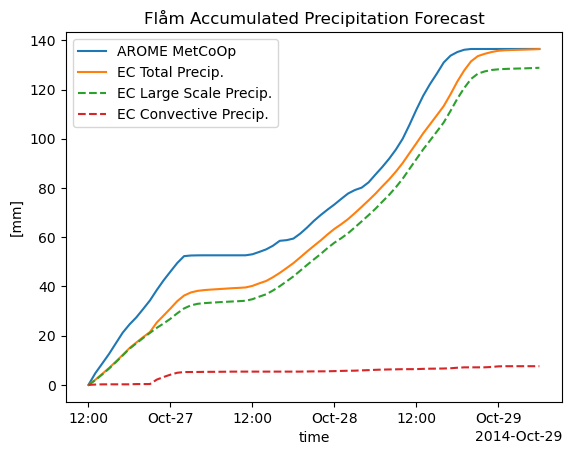

In [8]:
pp_acc_point_arome.plot(x='time', linestyle='-', label='AROME MetCoOp')
(pp_acc_point_ecifs.TP*1000).plot(x='time', linestyle='-',label='EC Total Precip.')
(pp_acc_point_ecifs.LSP*1000).plot(x='time', linestyle='--',label='EC Large Scale Precip.')
((pp_acc_point_ecifs.TP-pp_acc_point_ecifs.LSP)*1000).plot(x='time',linestyle='--',label='EC Convective Precip.')

plt.ylabel('[mm]')
plt.legend()
plt.title("Flåm Accumulated Precipitation Forecast")

### Plot the two accumulated precipitation forecasts on a map

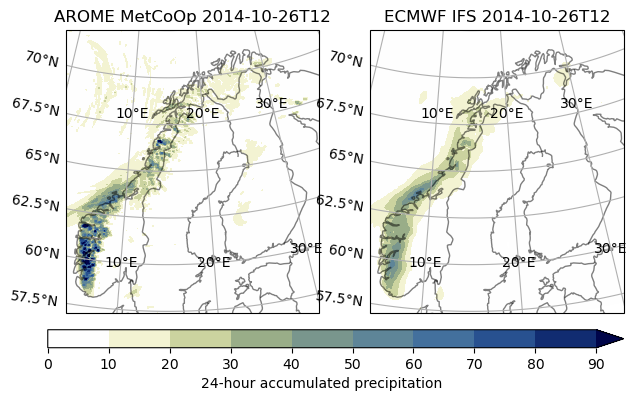

In [9]:
timestep = 24 # 24-hour accumulated precipitation
levelsPP = range(0,100,10)


projection = cy.crs.LambertConformal(central_longitude =arome.projection_lambert.longitude_of_central_meridian,
                                       central_latitude  =arome.projection_lambert.latitude_of_projection_origin,
                                       standard_parallels = arome.projection_lambert.standard_parallel)
f, axsm = plt.subplots(1,2, subplot_kw={'projection' : projection}, figsize=(7.2,7.2), sharex=True, sharey=True)

for ax in axsm.flatten():
    ax.set_extent([5, 30, 57, 72], cy.crs.PlateCarree())
    ax.add_feature(cy.feature.COASTLINE, alpha=0.5)
    ax.add_feature(cy.feature.BORDERS, alpha=0.5)
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels   = False
    gl.right_labels = False
    
arome.precipitation_amount_acc.isel(time=timestep,height0=0).plot.contourf(ax=axsm[0], transform=projection, cmap=cm.davos_r, extend='max',levels=levelsPP,add_colorbar=False)
axsm[0].set_title('AROME MetCoOp '+np.datetime_as_string(arome.time[0],unit='h'))

cf = (ecifs.TP.isel(time=timestep)*1000).plot.contourf(ax=axsm[1], transform=cy.crs.PlateCarree(), cmap=cm.davos_r, extend='max', levels=levelsPP, add_colorbar=False)
axsm[1].set_title ('ECMWF IFS '+np.datetime_as_string(arome.time[0],unit='h'))

cbaxes = f.add_axes([0.1, 0.25, 0.8, 0.025])
cbar = plt.colorbar(cf, cax=cbaxes, shrink=0.5, orientation='horizontal', extend='max',label='24-hour accumulated precipitation')

__Task 2 a)__
* What are the differences between the models, and what might be a major reason for the differences in the precipitation maps?

__Answers__

From the precipitation maps above we see that the regional model, AROME, forecasted a larger amount of precipitation than the global model, ECMWF. The reason for this difference could be different parametrization of cloud microphysics within the models. We know from the lectures that coarser models, such as global ones, need to parametrize convective precipitation, whereas finer models can simulate it. This is due to the scales of the convective processes being smaller than the grid-resolution in coarser models. It has been seen before that during such extreme events, the AROME model forecasts the precipitation better both for magnitude and location.

__Task 2 b)__

* Plot also temperature and winds of the two model forecasting systems. Compare, interpret, and describe your findings.

In [10]:
# Converting to Celcius
arome.air_temperature_2m.values = arome.air_temperature_2m.values - 273.15
ecifs.T2M.values = ecifs.T2M.values - 273.15

In [11]:
# Extent of area
min_lon = lon0 - 4
max_lon = lon0 + 2

min_lat = lat0 - 2
max_lat = lat0 + 2

# Defining the boundaries
lon_bnds = [min_lon, max_lon]
lat_bnds = [min_lat, max_lat]

[ymin,xmin] = findindex(arome.latitude,arome.longitude, min_lat, min_lon)
[ymax,xmax] = findindex(arome.latitude,arome.longitude, max_lat, max_lon)

# Reducing datasets, to not make the kernel crash 
arome_a = arome.isel(y=slice(ymin, ymax), x=slice(xmin, xmax))

# Now same for ECIFS
# Finding the closest indices
min_lat_idx = ecifs.lat.sel(lat=min_lat, method='nearest').values
max_lat_idx = ecifs.lat.sel(lat=max_lat, method='nearest').values
min_lon_idx = ecifs.lon.sel(lon=min_lon, method='nearest').values
max_lon_idx = ecifs.lon.sel(lon=max_lon, method='nearest').values

# Subsetting the dataset using indices
ecifs_a = ecifs.sel(lat=slice(min_lat_idx, max_lat_idx),lon=slice(min_lon_idx, max_lon_idx))

/var/folders/tp/bn0hk5sx7fq7r171hlv9tzq40000gn/T/ipykernel_81437/4120774711.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y=int(y)
/var/folders/tp/bn0hk5sx7fq7r171hlv9tzq40000gn/T/ipykernel_81437/4120774711.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x=int(x)
/var/folders/tp/bn0hk5sx7fq7r171hlv9tzq40000gn/T/ipykernel_81437/4120774711.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y=int(y)
/var/folders/tp/bn0hk5sx7fq7r171hlv9tzq40000gn/T/ipykernel

Text(0.5, 1.0, 'ECMWF IFS')

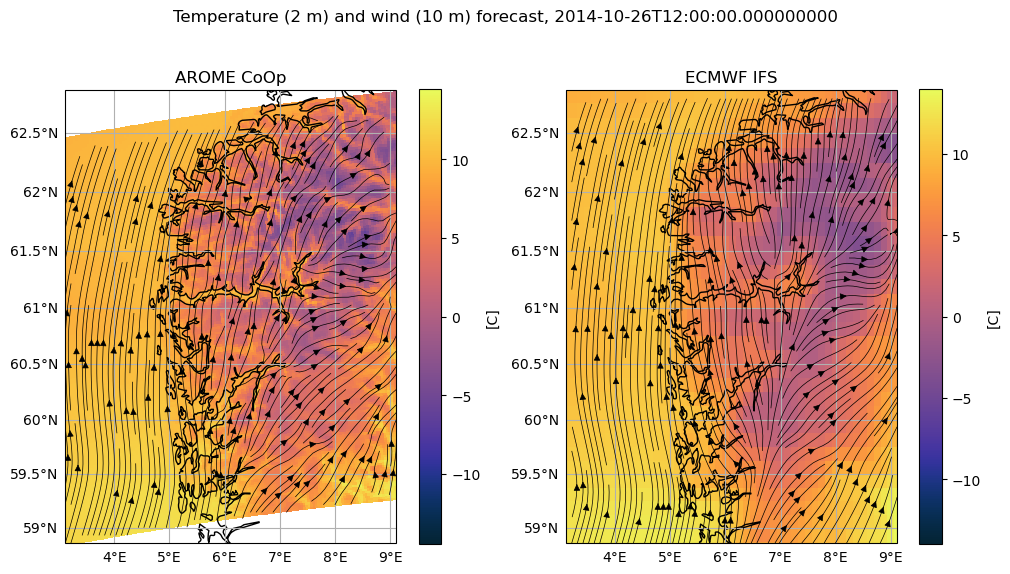

In [12]:
proj = cy.crs.Mercator()

fig, axs = plt.subplots(1, 2, figsize=(10,6), subplot_kw={'projection': proj}, constrained_layout=True)

axs[0].set_extent([min_lon, max_lon, min_lat, max_lat], cy.crs.PlateCarree())
axs[1].set_extent([min_lon, max_lon, min_lat, max_lat], cy.crs.PlateCarree())

for ax in axs:
    ax.add_feature(cy.feature.COASTLINE, zorder=2)
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels   = False
    gl.right_labels = False

arome_a.air_temperature_2m.isel(time= timestep, height1=0).plot(ax=axs[0], x='longitude', y='latitude', transform=cy.crs.PlateCarree(), cmap=cmo.thermal, cbar_kwargs={'shrink': 0.8, 'label': '[C]'})
ecifs_a.T2M.isel(time=timestep).plot(ax=axs[1], x='lon', y='lat', transform=cy.crs.PlateCarree(), cmap=cmo.thermal, cbar_kwargs={'shrink': 0.8, 'label': '[C]'})

#arome_a.isel(time=timestep, height2=0, x=slice(None, None, 5), y=slice(None, None, 5)).plot.quiver(ax=axs[0], x='longitude', y='latitude', u='x_wind_10m', v='y_wind_10m', transform=cy.crs.PlateCarree(), scale=400)
#ecifs_a.isel(time=timestep).plot.quiver(ax=axs[1], x='lon', y='lat', u='U10M', v='V10M', transform=cy.crs.PlateCarree(), scale = 400)

# I think streamplot looks nicer than quiver
arome_a.isel(time=timestep, height2=0, x=slice(None, None, 5), y=slice(None, None, 5)).plot.streamplot(ax=axs[0], x='longitude', y='latitude', u='x_wind_10m', v='y_wind_10m', transform=cy.crs.PlateCarree(), density =2, color = 'black', linewidth=0.5)
ecifs_a.isel(time=timestep).plot.streamplot(ax=axs[1], x='lon', y='lat', u='U10M', v='V10M', transform=cy.crs.PlateCarree(), density =2, color = 'black', linewidth =0.5)

fig.suptitle(f'Temperature (2 m) and wind (10 m) forecast, {arome.time[0].values}')
axs[0].set_title('AROME CoOp')
axs[1].set_title('ECMWF IFS')

In [13]:
lat0=60.8610; lon0=7.1128 # Flåm in Western Norway

[yloc,xloc] = findindex(arome_a.latitude,arome_a.longitude,lat0,lon0) # from regional model AROME MetCoOp

print(float(arome_a.latitude[yloc,xloc]))
print(float(arome_a.longitude[yloc,xloc]))

60.85884915703827
7.091471930071294


/var/folders/tp/bn0hk5sx7fq7r171hlv9tzq40000gn/T/ipykernel_81437/4120774711.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y=int(y)
/var/folders/tp/bn0hk5sx7fq7r171hlv9tzq40000gn/T/ipykernel_81437/4120774711.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x=int(x)


In [14]:
wind_x_arome = arome_a.x_wind_10m[:, 0,xloc, yloc]
wind_y_arome = arome_a.y_wind_10m[:, 0,xloc, yloc]

In [15]:
wind_x_ecifs = ecifs_a.U10M.sel(lat=lat0, lon=lon0, method='nearest')
wind_y_ecifs = ecifs_a.V10M.sel(lat=lat0, lon=lon0, method='nearest')

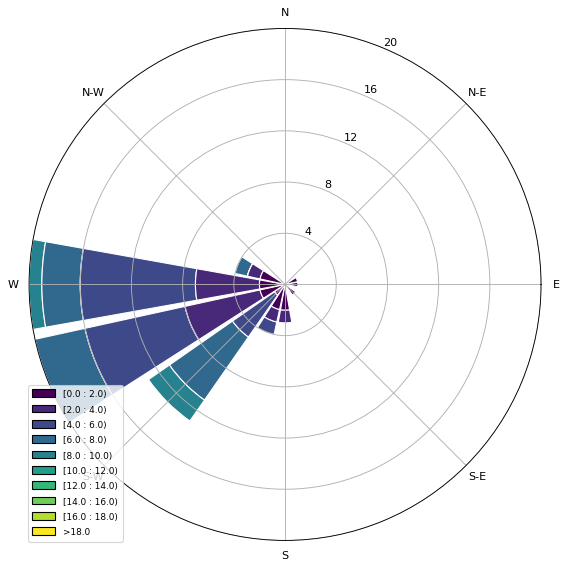

In [16]:
# Get the speed and direction of the winds
unit = metpy.units.units('m/s')
speed = np.squeeze(metpy.calc.wind_speed(wind_x_arome.values*unit, wind_y_arome.values*unit))
direction = np.squeeze(metpy.calc.wind_direction(wind_x_arome.values*unit, wind_y_arome.values*unit, convention='from'))

deg = np.array(np.round(direction, 1))
spd = np.array(np.round(speed, 2))

ax = windrose.WindroseAxes.from_ax()
ax.bar(deg, spd, opening = 0.9, edgecolor = 'white', bins = np.arange(0, 20, 2))
ax.set_legend()

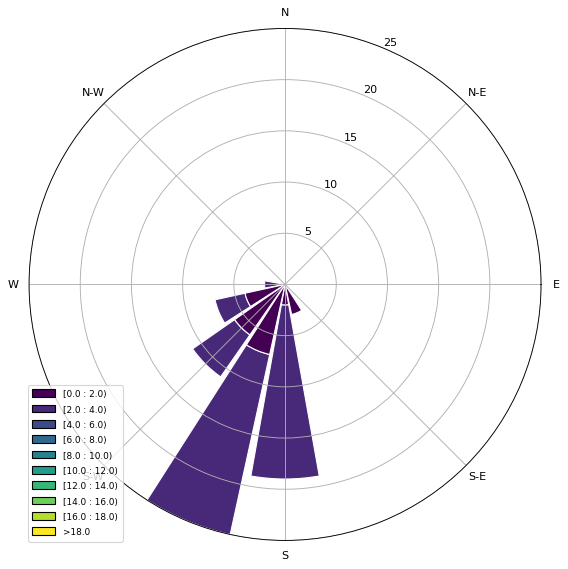

In [17]:
# Get the speed and direction of the winds
unit = metpy.units.units('m/s')
speed = np.squeeze(metpy.calc.wind_speed(wind_x_ecifs.values*unit, wind_y_ecifs.values*unit))
direction = np.squeeze(metpy.calc.wind_direction(wind_x_ecifs.values*unit, wind_y_ecifs.values*unit, convention='from'))

deg = np.array(np.round(direction, 1))
spd = np.array(np.round(speed, 2))

ax = windrose.WindroseAxes.from_ax()
ax.bar(deg, spd, opening = 0.9, edgecolor = 'white', bins = np.arange(0, 20, 2))
ax.set_legend()

__Answers__
We clearly see a finer resolution in the regional model vs the global model. The global model does not capture the details of the fjords and the dynamic topography of the coast of western Norway. 

The forecasted temperature range is the same between both models. The streamplot reveals a more intricate wind system in the fjords and valleys. As for the magnitude of the wind, AROME forecasted stronger winds than ECMWF. From the windroses we see that they also differ in the direction of the wind. ECMWF forecasted southern winds whereas AROME forecasted more westerly winds. This may be due to that ECMWF does not capture the blocking topography in the south as well as AROME. 


__Task 3__

You shall also access the forecasts of the Polar Low from February 4, 2020 from the global ECMWF system:

* Modify the code, so that the files for February 04 are read in. Compare the forecasts of the two forecasting systems as maps and point forecasts, in particular the wind forecast is of interest in this case. What are the main differences and what could be the cause for it? 

In [18]:
url = 'https://thredds.met.no/thredds/dodsC/mepsoldarchive/2020/02/04/meps_mbr1_full_2_5km_20200204T00Z.nc'
arome20 = xr.open_dataset(url)

day='04'; month='02'; year='2020'; HH='12'
url='https://thredds.met.no/thredds/dodsC/metusers/maltem/GEO4902_2020/Arctic.ECMWF_extracted_'+str(year)+str(month)+str(day)+'T'+str(HH)+'Z.nc'
ecifs20 =  xr.open_dataset(url)

In [19]:
arome20 = arome20.isel(time = slice(11, None))

In [20]:
# Now looking at Tromsø
lat0=69.6492; lon0=18.9553 

[yloc,xloc] = findindex(arome20.latitude,arome20.longitude,lat0,lon0) # from regional model AROME MetCoOp

/var/folders/tp/bn0hk5sx7fq7r171hlv9tzq40000gn/T/ipykernel_81437/4120774711.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y=int(y)
/var/folders/tp/bn0hk5sx7fq7r171hlv9tzq40000gn/T/ipykernel_81437/4120774711.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x=int(x)


In [21]:
pp_acc_point_arome = arome20.precipitation_amount_acc.isel(height0=0,y=yloc,x=xloc)
pp_acc_point_ecifs = ecifs20.sel(lat=lat0,lon=lon0, method='nearest')

Text(0.5, 1.0, 'Tromsø Accumulated Precipitation Forecast')

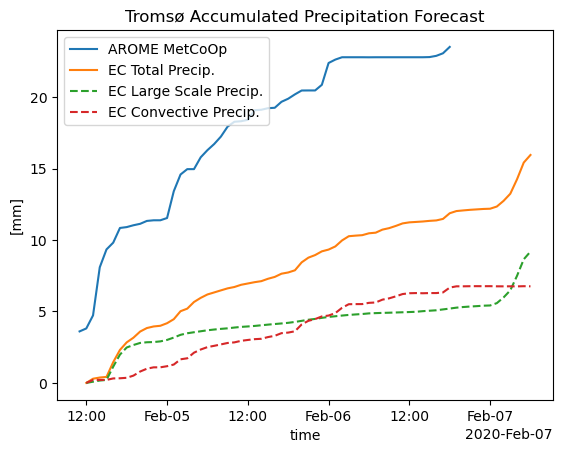

In [22]:
pp_acc_point_arome.plot(x='time', linestyle='-', label='AROME MetCoOp')
(pp_acc_point_ecifs.TP*1000).plot(x='time', linestyle='-',label='EC Total Precip.')
(pp_acc_point_ecifs.LSP*1000).plot(x='time', linestyle='--',label='EC Large Scale Precip.')
((pp_acc_point_ecifs.TP-pp_acc_point_ecifs.LSP)*1000).plot(x='time',linestyle='--',label='EC Convective Precip.')

plt.ylabel('[mm]')
plt.legend()
plt.title("Tromsø Accumulated Precipitation Forecast")

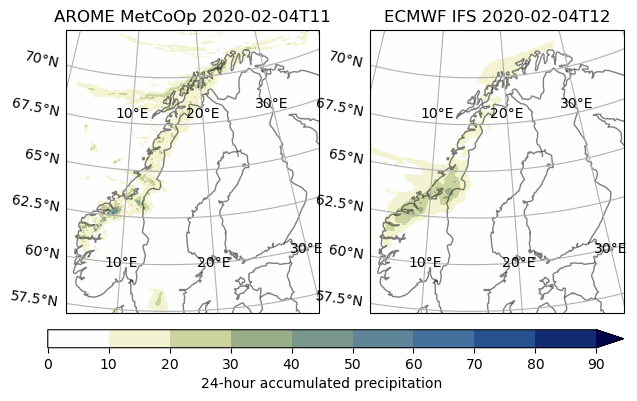

In [23]:
timestep = 24 # 24-hour accumulated precipitation
levelsPP = range(0,100,10)


projection = cy.crs.LambertConformal(central_longitude =arome.projection_lambert.longitude_of_central_meridian,
                                       central_latitude  =arome.projection_lambert.latitude_of_projection_origin,
                                       standard_parallels = arome.projection_lambert.standard_parallel)
f, axsm = plt.subplots(1,2, subplot_kw={'projection' : projection}, figsize=(7.2,7.2), sharex=True, sharey=True)

for ax in axsm.flatten():
    ax.set_extent([5, 30, 57, 72], cy.crs.PlateCarree())
    ax.add_feature(cy.feature.COASTLINE, alpha=0.5)
    ax.add_feature(cy.feature.BORDERS, alpha=0.5)
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels   = False
    gl.right_labels = False
    
arome20.precipitation_amount_acc.isel(time=timestep,height0=0).plot.contourf(ax=axsm[0], transform=projection, cmap=cm.davos_r, extend='max',levels=levelsPP,add_colorbar=False)
axsm[0].set_title('AROME MetCoOp '+np.datetime_as_string(arome20.time[0],unit='h'))

cf = (ecifs20.TP.isel(time=timestep)*1000).plot.contourf(ax=axsm[1], transform=cy.crs.PlateCarree(), cmap=cm.davos_r, extend='max', levels=levelsPP, add_colorbar=False)
axsm[1].set_title ('ECMWF IFS '+np.datetime_as_string(ecifs20.time[0],unit='h'))

cbaxes = f.add_axes([0.1, 0.25, 0.8, 0.025])
cbar = plt.colorbar(cf, cax=cbaxes, shrink=0.5, orientation='horizontal', extend='max',label='24-hour accumulated precipitation')

In [24]:
ecifs20

<xarray.Dataset> Size: 396MB
Dimensions:  (time: 67, lon: 961, lat: 256)
Coordinates:
  * time     (time) datetime64[ns] 536B 2020-02-04T12:00:00 ... 2020-02-07T06...
  * lon      (lon) float64 8kB -60.0 -59.88 -59.75 -59.62 ... 59.75 59.88 60.0
  * lat      (lat) float64 2kB 57.06 57.19 57.31 57.44 ... 88.69 88.81 88.94
Data variables:
    SP       (time, lat, lon) float32 66MB ...
    U10M     (time, lat, lon) float32 66MB ...
    V10M     (time, lat, lon) float32 66MB ...
    T2M      (time, lat, lon) float32 66MB ...
    TP       (time, lat, lon) float32 66MB ...
    LSP      (time, lat, lon) float32 66MB ...
Attributes:
    CDI:                             Climate Data Interface version 1.9.8 (ht...
    Conventions:                     CF-1.6
    history:                         Wed Aug 19 21:35:17 2020: cdo -sellonlat...
    institution:                     European Centre for Medium-Range Weather...
    CDO:                             Climate Data Operators version 1.9.8 (ht...
    DODS_EXTRA.Unlimited_Dimension:  time

In [28]:
# Point forecast

temp_arome = arome20.air_temperature_2m.isel(height1 = 0, y=yloc, x=xloc)
windspeed_arome = np.sqrt( (arome20.x_wind_10m.isel(height7=0, y=yloc, x=xloc).values)**2 + (arome20.y_wind_10m.isel(time=13, height7=0, y=yloc, x=xloc).values)**2 )
precip_arome = arome20.precipitation_amount_acc.isel(height0 =0,  y=yloc, x=xloc)

temp_ecifs = ecifs20.T2M.sel(lat=lat0, lon=lon0, method='nearest')
windspeed_ecifs = np.sqrt( (ecifs20.U10M.sel(lat=lat0, lon=lon0, method='nearest').values)**2 + (ecifs20.V10M.sel(lat=lat0, lon=lon0, method='nearest').values)**2)
precip_ecifs = ecifs20.TP.sel(lat=lat0, lon=lon0, method = 'nearest')

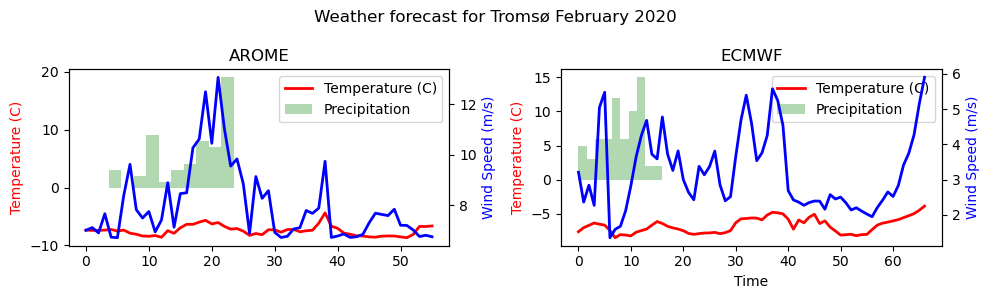

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))

ax1 = ax[0]
ax1.plot(temp_arome - 273.15, color='r', label='Temperature (C)', lw=2)
ax1.set_ylabel('Temperature (C)', color='r')

ax1_wind = ax1.twinx()
ax1_wind.plot(windspeed_arome, color='b', label='Wind Speed (m/s)', lw=2)
ax1_wind.set_ylabel('Wind Speed (m/s)', color='b')
ax1.hist(precip_arome, bins=10, alpha=0.3, color='g', label='Precipitation')
ax1.legend()
ax1.set_title('AROME')

ax2 = ax[1]
ax2.plot(temp_ecifs - 273.15, color='r', label='Temperature (C)', lw=2)
ax2.set_ylabel('Temperature (C)', color='r')

ax2_wind = ax2.twinx()
ax2_wind.plot(windspeed_ecifs, color='b', label='Wind Speed (m/s)', lw=2)
ax2_wind.set_ylabel('Wind Speed (m/s)', color='b')
ax2.hist(precip_ecifs*1000, bins=10, alpha=0.3, color='g', label='Precipitation')
ax2.legend()
ax2.set_title('ECMWF')
ax2.set_xlabel('Time')

fig.suptitle('Weather forecast for Tromsø February 2020')

fig.tight_layout()

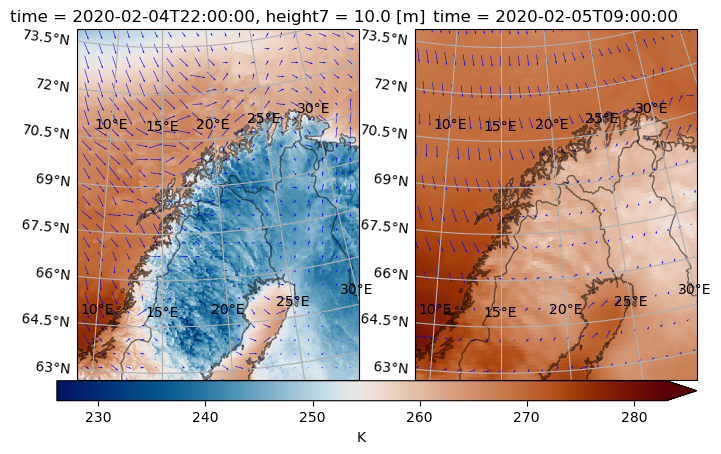

In [27]:
projection = cy.crs.LambertConformal(central_longitude =arome.projection_lambert.longitude_of_central_meridian,
                                       central_latitude  =arome.projection_lambert.latitude_of_projection_origin,
                                       standard_parallels = arome.projection_lambert.standard_parallel)
f, axsm = plt.subplots(1,2, subplot_kw={'projection' : projection}, figsize=(8, 8), sharex=True, sharey=True)

for ax in axsm.flatten():
    ax.set_extent([lon0 - 10, lon0 + 10, lat0-7, lat0+4], cy.crs.PlateCarree())
    ax.add_feature(cy.feature.COASTLINE, alpha=0.5)
    ax.add_feature(cy.feature.BORDERS, alpha=0.5)
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels   = False
    gl.right_labels = False
    
cf0 = (arome20.air_temperature_2m.isel(time=11, height1=0).plot(ax=axsm[0], x='longitude', y='latitude', transform=cy.crs.PlateCarree(), cmap=cm.vik, add_colorbar=False))
axsm[0].set_title('AROME MetCoOp '+np.datetime_as_string(arome20.time[11],unit='h'))

cf = (ecifs20.T2M.isel(time=21)).plot(ax=axsm[1], x='lon', y='lat', transform=cy.crs.PlateCarree(), cmap=cm.vik, add_colorbar=False )
axsm[1].set_title ('ECMWF IFS '+np.datetime_as_string(ecifs20.time[21],unit='h'))

arome20.isel(time=11, height7=0, x=slice(None, None, 20), y=slice(None, None, 20)).plot.quiver(ax=axsm[0], x='longitude', y='latitude', u='x_wind_10m', v='y_wind_10m', transform=cy.crs.PlateCarree(), scale=300, width=0.002, color='blue')
ecifs20.isel(time=21, lon=slice(None, None, 8), lat=slice(None, None, 8)).plot.quiver(ax=axsm[1], x='lon', y='lat', u='U10M', v='V10M', transform=cy.crs.PlateCarree(), scale=300, width=0.002, color='blue')

cbaxes = f.add_axes([0.1, 0.25, 0.8, 0.025])
cbar = plt.colorbar(cf, cax=cbaxes, pad= 10, shrink=0.1, orientation='horizontal', extend='max',label='K')

__Answers__

* Above I have made plots for the polar low in februayr 2020 using model data. What I noticed first is that AROME forecasted alot more precipiation than ECMWF. On the precipitation map we also see they differ in where the precipitation was forecasted. 
* In the point forecast for Tromsø, the wind speed are alot larger for AROME while the temperatures are alot lower for ECMWF when comparing the two models.
* As for the winds seen as a quiver plot in the last plot/maps, there is an area with counter-clockwise rotation outside the coast of the northern most parts of Norway that is not fully captured in the global model. 

__Notes__
* I did not have alot of time to work on this assignment due to some downtime on the Thredds server. Due to that, I could not start the work properly until Thursday, while it was due on Monday. Because I had to go to work during the weekend, the descriptions/interpretations of the plots may not be the best. I would love to get some feedback and help to interpret it and some hints towards what I should look for when assessing the maps and plots. 